# Disney+ Exploratory Analysis - TV Shows and Movies

The dataset consists of meta details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year, the rating, duration etc. As the first step, let's load the dataset, create some new features. In this kernel, I have analysed this dataset to find top insights and findings. 


In [44]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 

df = pd.read_csv(r"C:\Users\succe\Downloads\Disney+ Exploratory Analysis - TV Shows and Movies.csv")

## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col: "type", "index": col})

## Type of Content on Disney+ 

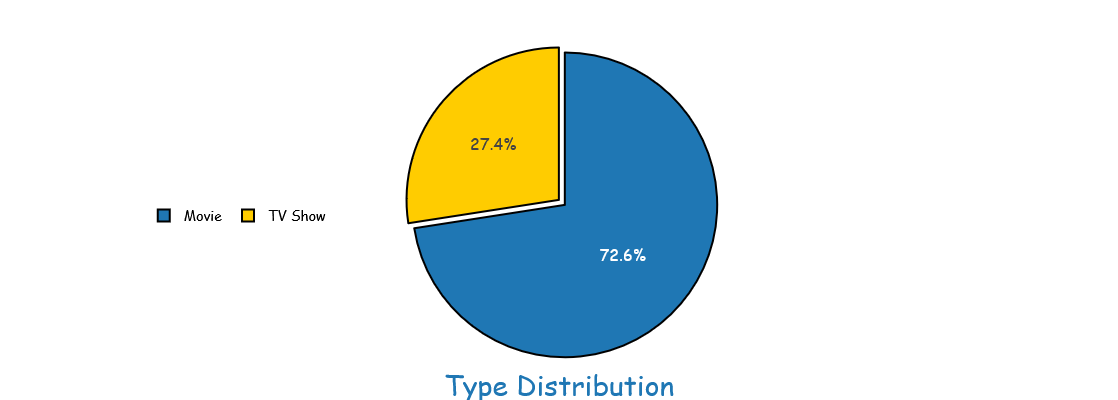

In [46]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col: "type", "index": col})

trace = go.Pie(
    labels=grouped[col], 
    values=grouped['count'], 
    pull=[0.05, 0], 
    marker=dict(
        colors=["#1f77b4", "#ffcc00", "#ffffff"],  
        line=dict(color="black", width=2)  
    )
)


layout = go.Layout(
    title="Type Distribution",  
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    title_x=0.5, 
    title_y=0.01, 
    height=400, 
    plot_bgcolor="#f1f1f1", 
    paper_bgcolor="#ffffff", 
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    legend=dict(x=0.1, y=0.5, orientation="h", font=dict(size=14, color="black")), 
    margin=dict(t=40, b=40, l=40, r=40),  
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)



## Content Added Over the Years

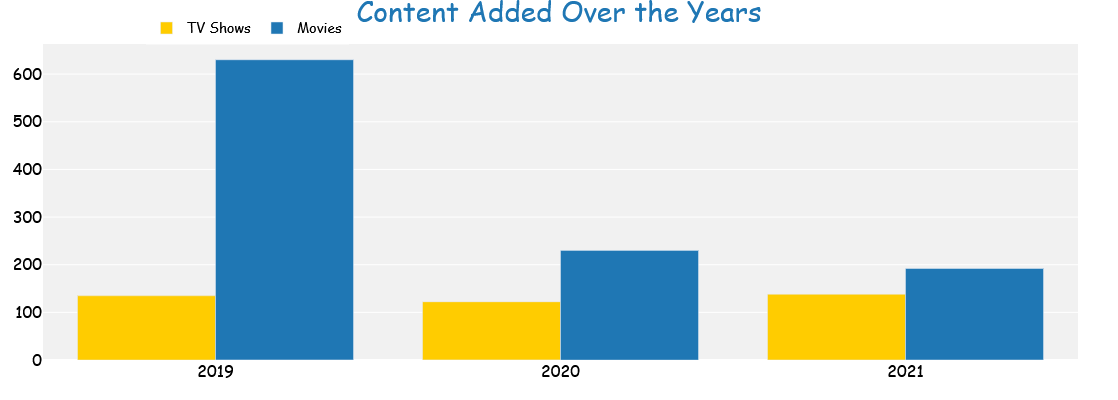

In [48]:
import plotly.graph_objects as go

# Filter data for TV Shows and Movies
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

# Process TV Shows data
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns={col: "year_added", "index": col})
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns={col: "year_added", "index": col})
vc2['percent'] = vc2['count'].apply(lambda x: 100 * x / sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#ffcc00")) 
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#1f77b4"))  

layout = go.Layout(
    title="Content Added Over the Years",  
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    title_x=0.5,  # Title centered
    height=400,
    plot_bgcolor="#f1f1f1",  
    paper_bgcolor="#ffffff",  
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")),  
    margin=dict(t=40, b=40, l=40, r=40),  
)

# Create the figure and plot
data = [trace1, trace2]
fig = go.Figure(data, layout=layout)
fig.show()


 
 ## Original Release Year of the movies

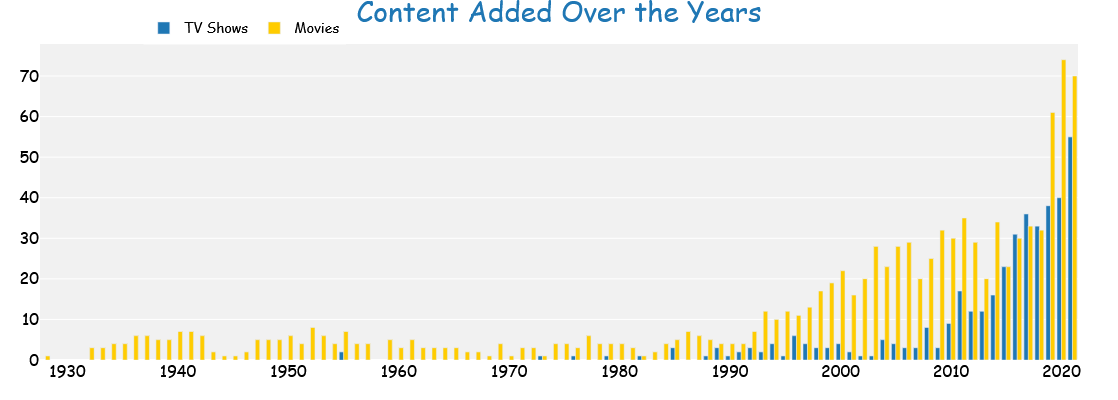

In [50]:

d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns={col: "release_year", "index": col})
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))
vc1 = vc1.sort_values(col)


vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns={col: "release_year", "index": col})
vc2['percent'] = vc2['count'].apply(lambda x: 100 * x / sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#1f77b4"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#ffcc00"))

layout = go.Layout(
    title="Content Added Over the Years", 
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"),  
    title_x=0.5, 
    height=400,
    plot_bgcolor="#f1f1f1", 
    paper_bgcolor="#ffffff", 
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")), 
    margin=dict(t=40, b=40, l=40, r=40),  
)

data = [trace1, trace2]
fig = go.Figure(data, layout=layout)
fig.show()


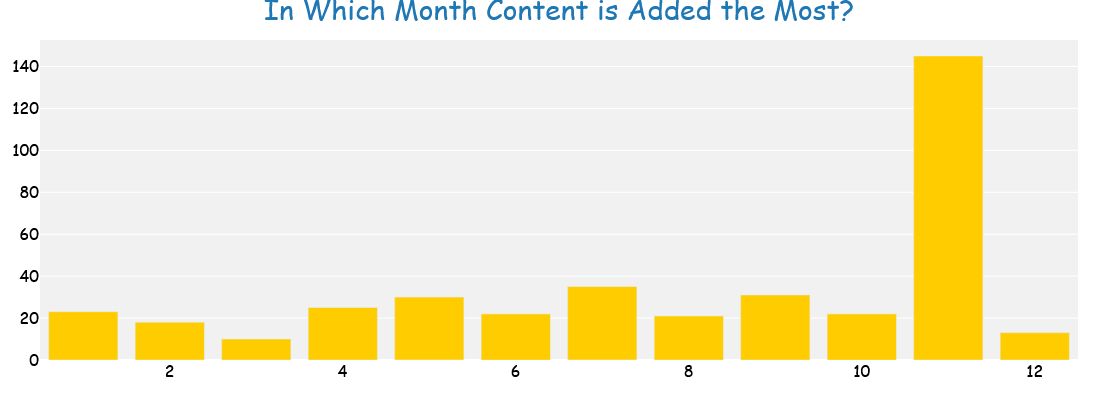

In [52]:
d1 = df[df["type"] == "TV Show"]

col = 'month_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns={col: "month_added", "index": col})
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#ffcc00"))

layout = go.Layout(
    title="In Which Month Content is Added the Most?",  
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    title_x=0.5, 
    height=400,
    plot_bgcolor="#f1f1f1",  
    paper_bgcolor="#ffffff", 
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")), 
    margin=dict(t=40, b=40, l=40, r=40), 
)

data = [trace1]
fig = go.Figure(data, layout=layout)
fig.show()


Some of the oldest movies on Disney+

In [54]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
1220,Steamboat Willie,1928
893,Flowers and Trees,1932
1178,Santa's Workshop,1932
736,Babes in the Woods,1932
1317,The Pied Piper,1933
1418,Ye Olden Days,1933
1362,Three Little Pigs,1933
1356,The Wise Little Hen,1934
922,Grasshopper and the Ants,1934
1279,The Goddess of Spring,1934


Some of the oldest TV Shows on Disney+

In [58]:
small = df.sort_values("release_year", ascending = True)
small = small[small['season_count'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
1071,Mickey Mouse Club (1955-59),1955
1244,The Adventures of Spin and Marty,1955
221,Schoolhouse Rock!,1973
299,The Muppet Show,1976
1207,Spider-Woman,1979
1205,Spider-Man and His Amazing Friends,1982
267,Star Wars: Ewoks,1985
195,Star Wars Vintage: Droids,1985
841,Disney's Adventures Of The Gummi Bears,1985
1312,The New Adventures of Winnie the Pooh,1988


There are movies / shows on the platform which were released way back in 1930s and 40s. 

## Content from different Countries

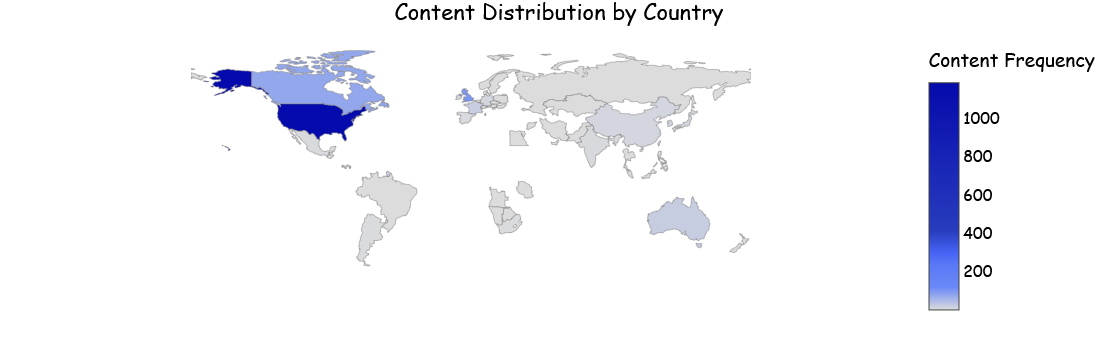

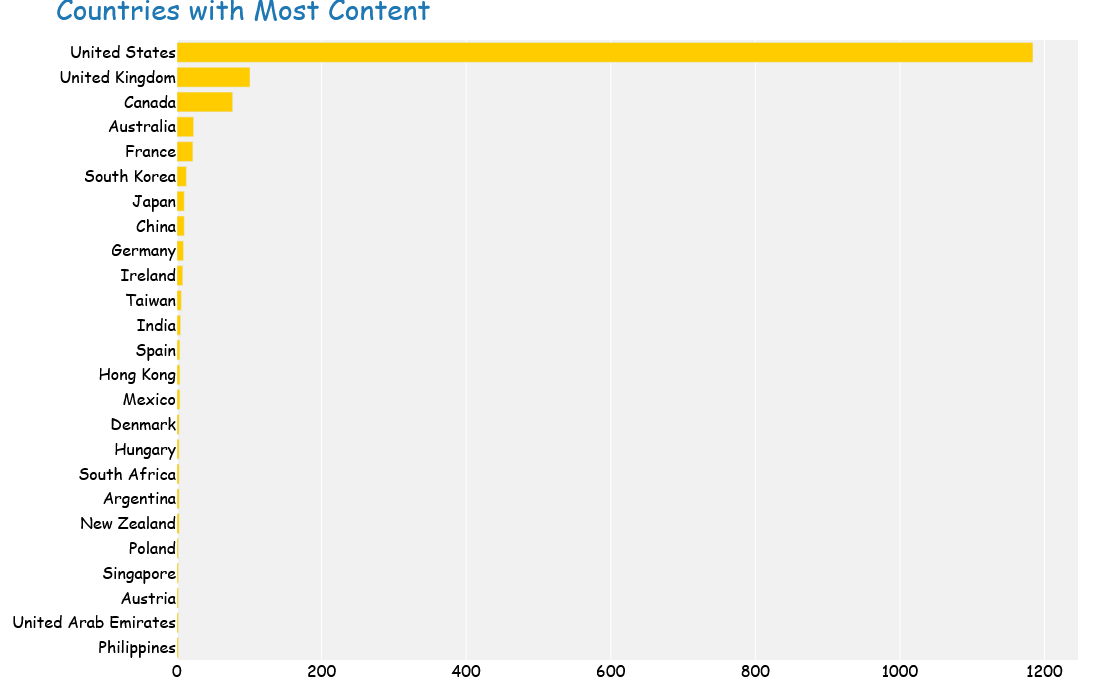

In [60]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}
import plotly.graph_objects as go
from collections import Counter

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
              "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
              "#08519c", "#0b4083", "#08306b"]

def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
        type='choropleth',
        locations=list(country_with_code.keys()),
        z=list(country_with_code.values()),
        colorscale=[[0, "rgb(5, 10, 172)"], [0.65, "rgb(40, 60, 190)"], [0.75, "rgb(70, 100, 245)"],
                   [0.80, "rgb(90, 120, 245)"], [0.9, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
        autocolorscale=False,
        reversescale=True,
        marker=dict(
            line=dict(
                color='gray',
                width=0.5
            )
        ),
        colorbar=dict(
            autotick=False,
            title='Content Frequency',
        ),
    )]

    layout = dict(
        title='Content Distribution by Country', 
        title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection=dict(type='Mercator')
        ),
        plot_bgcolor="#f1f1f1",  
        paper_bgcolor="#ffffff",  
        font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"), 
        margin=dict(t=40, b=40, l=40, r=40),  
    )

    fig = dict(data=data, layout=layout)
    iplot(fig, validate=False, filename='d3-world-map')
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]



trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#ffcc00"))

data = [trace1]
layout = go.Layout(
    title="Countries with Most Content",  
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    height=700,
    plot_bgcolor="#f1f1f1", 
    paper_bgcolor="#ffffff", 
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")), 
    margin=dict(t=40, b=40, l=40, r=40), 
)

fig = go.Figure(data, layout=layout)
fig.show()


## Distribution of Movie Duration

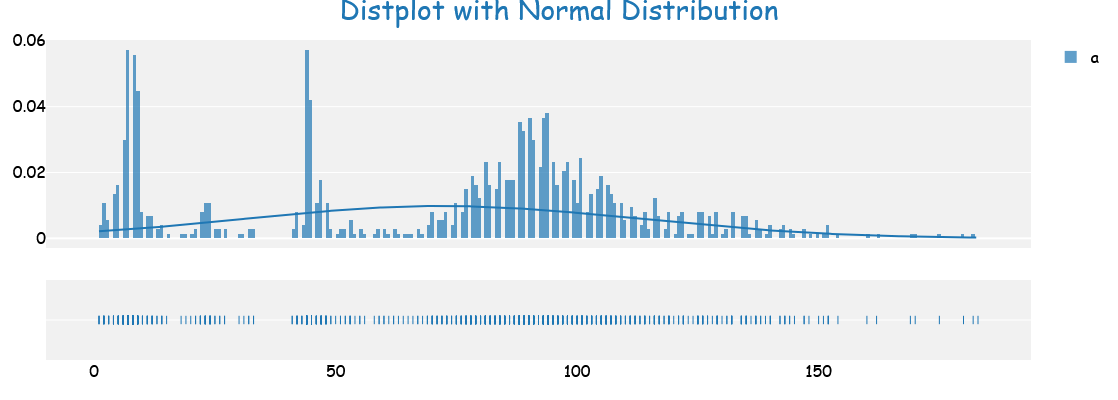

In [62]:
import plotly.figure_factory as ff

x1 = d2['duration'].fillna(0.0).astype(float)

fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#1f77b4"])

fig.update_layout(
    title_text='Distplot with Normal Distribution',
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"),  
    title_x=0.5, 
    height=400,
    plot_bgcolor="#f1f1f1",  
    paper_bgcolor="#ffffff",  
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"), 
    margin=dict(t=40, b=40, l=40, r=40),  
)


fig.show()


## TV Shows with many seasons 

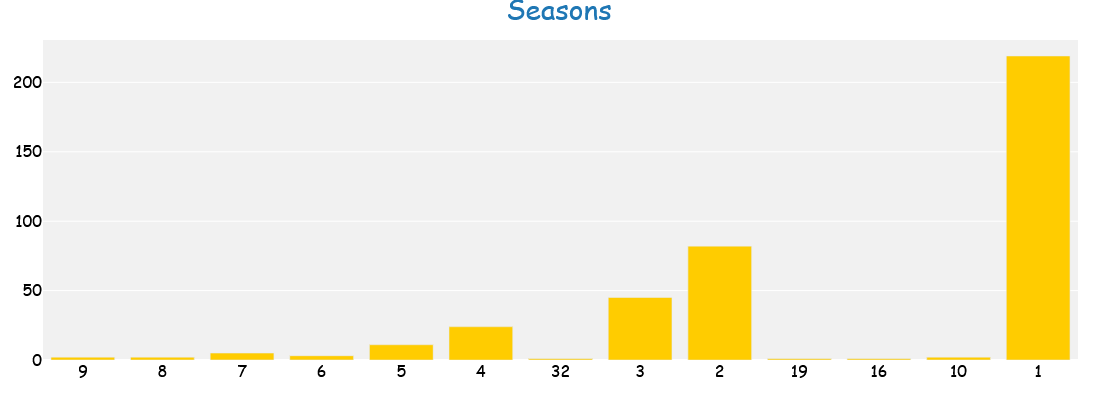

In [64]:
import plotly.graph_objects as go

col = 'season_count'

# Process TV Shows data
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns={col: "season_count", "index": col})
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))
vc1 = vc1.sort_values(col)
vc1 = vc1.sort_values("season_count", ascending=False) 

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#ffcc00"))


data = [trace1]
layout = go.Layout(
    title="Seasons", 
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"),  
    title_x=0.5,  
    height=400,
    plot_bgcolor="#f1f1f1", 
    paper_bgcolor="#ffffff",  
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"), 
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")),  
    margin=dict(t=40, b=40, l=40, r=40),  
)

# Create the figure and plot
fig = go.Figure(data, layout=layout)
fig.show()


## The ratings of the content 

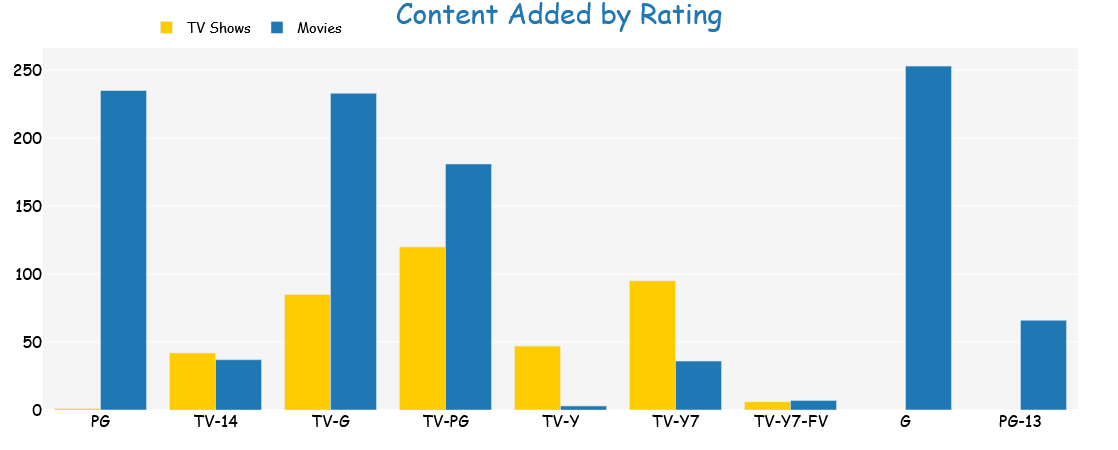

In [66]:


col = "rating"

# Process TV Shows data
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns={col: "rating", "index": col})
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))
vc1 = vc1.sort_values(col)

# Process Movies data
vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns={col: "rating", "index": col})
vc2['percent'] = vc2['count'].apply(lambda x: 100 * x / sum(vc2['count']))
vc2 = vc2.sort_values(col)


trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#ffcc00"))  
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#1f77b4")) 


layout = go.Layout(
    title="Content Added by Rating",  
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    title_x=0.5, 
    height=450,
    plot_bgcolor="#f5f5f5",  
    paper_bgcolor="#ffffff", 
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")),  
    margin=dict(t=40, b=40, l=40, r=40), 
)


data = [trace1, trace2]
fig = go.Figure(data, layout=layout)
fig.show()


## What are the top Categories ?

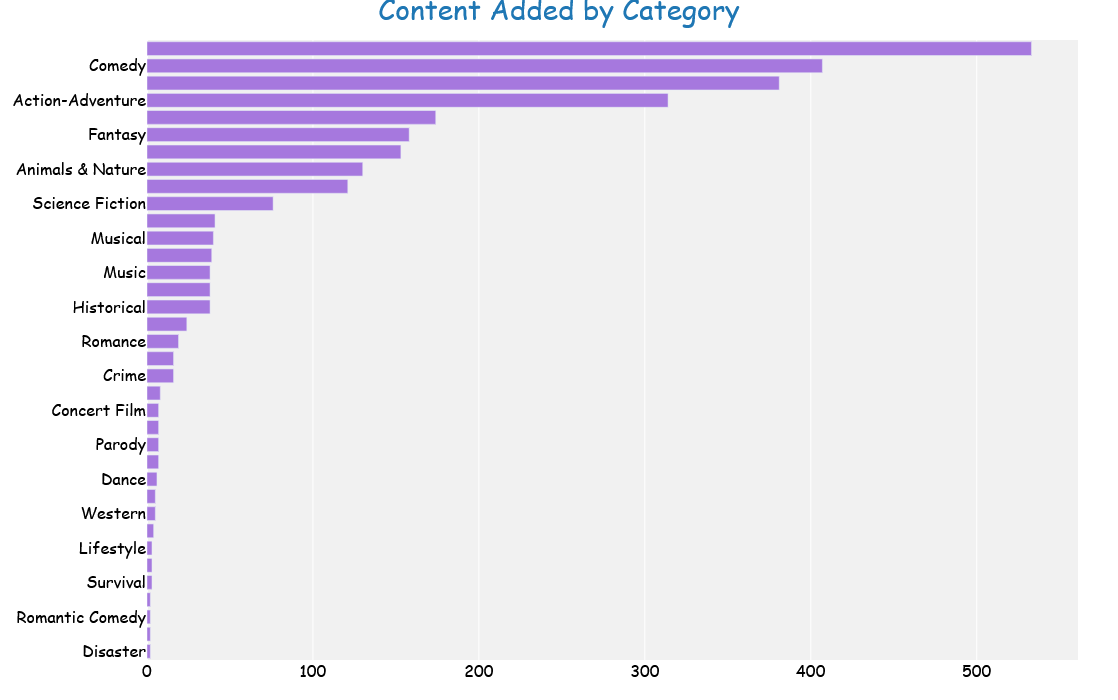

In [68]:
import plotly.graph_objects as go
from collections import Counter

col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)

labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]

trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]

layout = go.Layout(
    title="Content Added by Category",  
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    title_x=0.5,  
    height=700,
    plot_bgcolor="#f1f1f1",  
    paper_bgcolor="#ffffff", 
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")), 
    margin=dict(t=40, b=40, l=40, r=40),  
)

fig = go.Figure(data, layout=layout)
fig.show()


## Top Actors on Disney+ with Most Movies

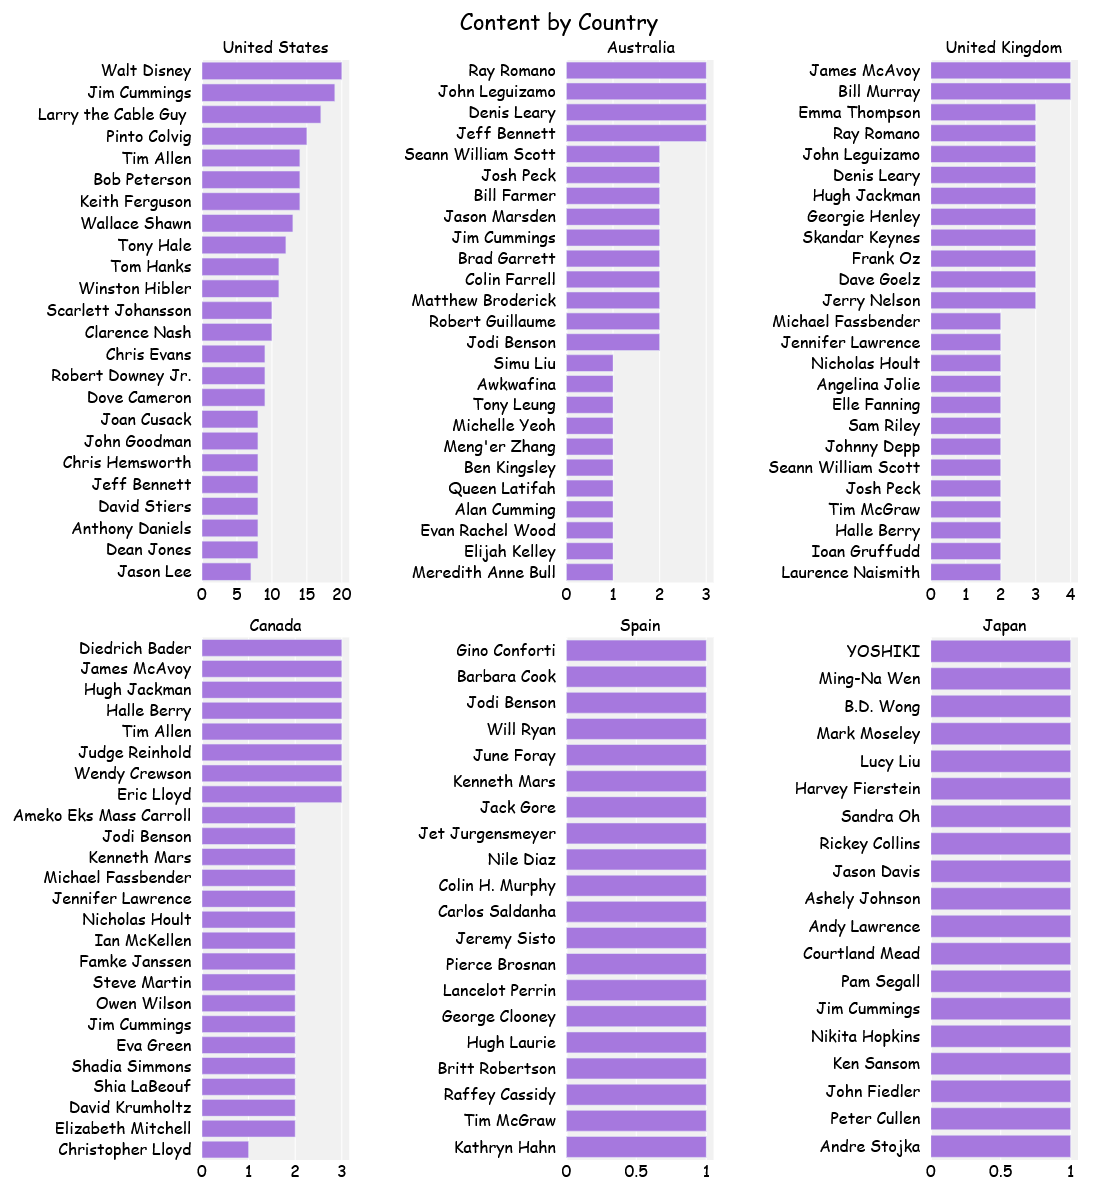

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

def country_trace(country, flag="movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

titles = ["United States", "", "Australia", "", "United Kingdom", "Canada", "", "Spain", "", "Japan"]

traces = []
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(
    rows=2, cols=5, subplot_titles=titles,
    vertical_spacing=0.05 
)

# Add the traces to the subplots
fig.add_trace(traces[0], 1, 1)
fig.add_trace(traces[1], 1, 3)
fig.add_trace(traces[2], 1, 5)
fig.add_trace(traces[3], 2, 1)
fig.add_trace(traces[4], 2, 3)
fig.add_trace(traces[5], 2, 5)


fig.update_layout(
    height=1200, 
    showlegend=False,  
    title_font=dict(size=32, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"),  
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    plot_bgcolor="#f1f1f1",  
    paper_bgcolor="#ffffff", 
    margin=dict(t=60, b=40, l=40, r=40),  
    title="Content by Country", 
    title_x=0.5,  
)

fig.show()


## Top Actors on Disney+ with Most TV Shows

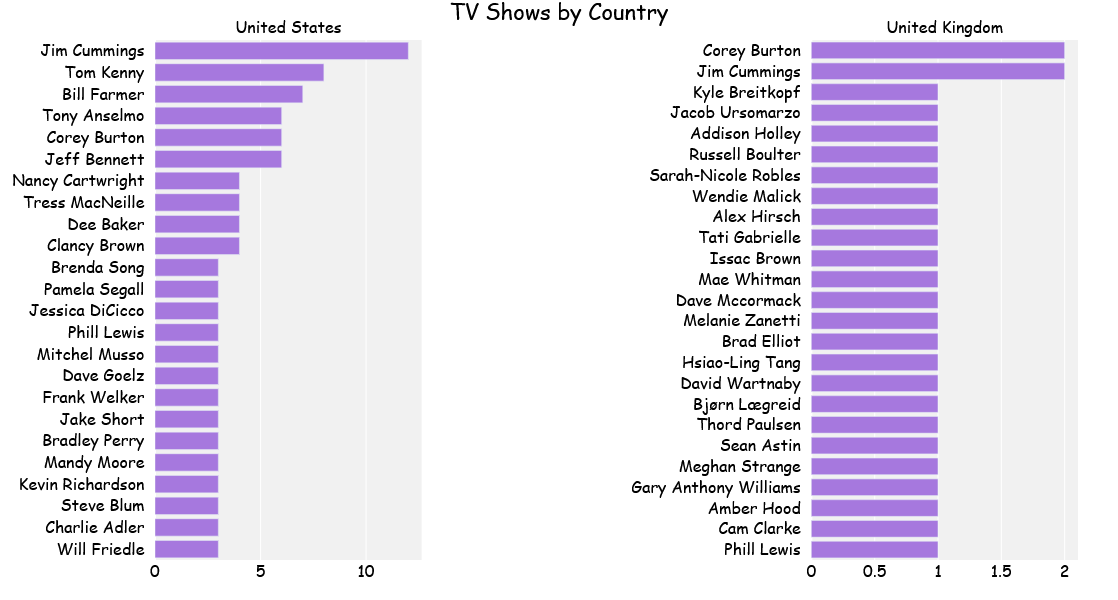

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

def country_trace(country, flag="tv_shows"):
    df["from_us"] = df['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "tv_shows":
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0] + "  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

titles = ["United States", "", "United Kingdom"]

traces = []
for title in titles:
    if title != "":
        traces.append(country_trace(title, flag="tv_shows"))

fig = make_subplots(rows=1, cols=3, subplot_titles=titles)


fig.add_trace(traces[0], 1, 1)
fig.add_trace(traces[1], 1, 3)

fig.update_layout(
    height=600, 
    showlegend=False, 
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"),  
    plot_bgcolor="#f1f1f1",  
    paper_bgcolor="#ffffff",  
    margin=dict(t=40, b=40, l=40, r=40),  
    title="TV Shows by Country", 
    title_x=0.5,  
)

fig.show()


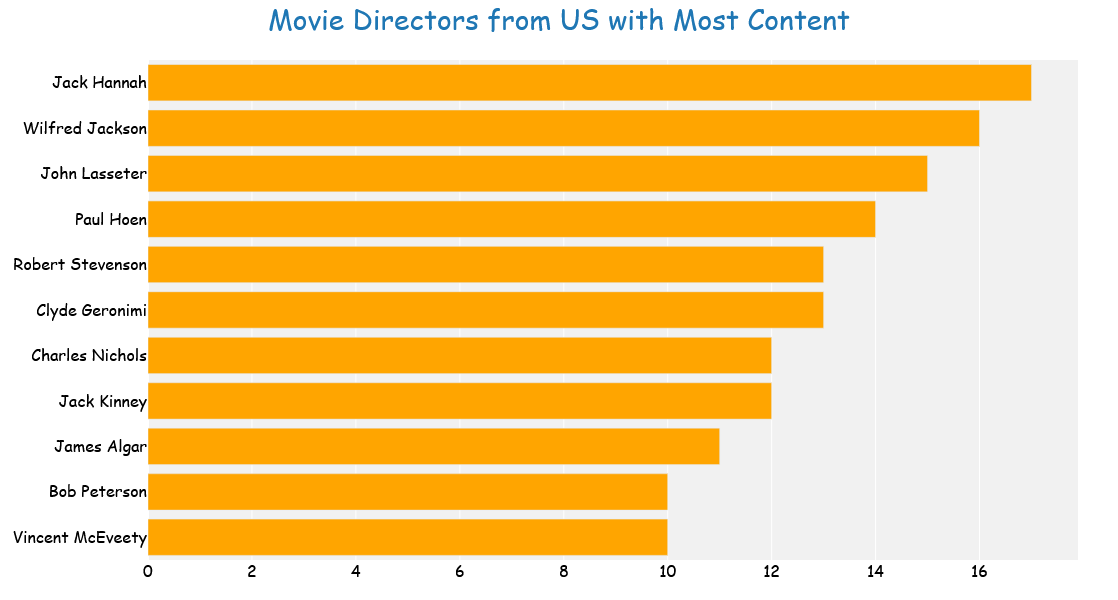

In [74]:
import plotly.graph_objects as go
from collections import Counter


small = df[df["type"] == "Movie"]
small = small[small["country"] == "United States"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]


trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movie Directors", marker=dict(color="orange"))


data = [trace1]

layout = go.Layout(
    title="Movie Directors from US with Most Content",  
    title_font=dict(size=28, color="#1f77b4", family="Comic Sans MS, Arial, sans-serif"), 
    title_x=0.5,  
    height=600,
    plot_bgcolor="#f1f1f1",  
    paper_bgcolor="#ffffff",  
    font=dict(color="black", size=16, family="Comic Sans MS, Arial, sans-serif"), 
    legend=dict(x=0.1, y=1.1, orientation="h", font=dict(size=14, color="black")), 
    margin=dict(t=60, b=40, l=40, r=40),  
)

# Create the figure and plot
fig = go.Figure(data, layout=layout)
fig.show()
